## Import Libraries & Load Dataset

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Dropout , Flatten
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Mnist Dataset

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

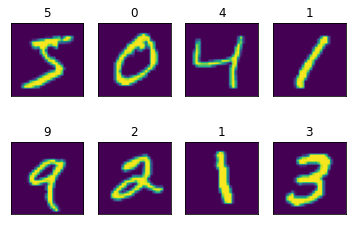

In [4]:
image_label = list(zip(X_train.reshape(-1,28,28),Y_train))
for index,(image,label) in enumerate(image_label[:8]):
    plt.subplot(2,4,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.title(label)

# Preprocessing

In [3]:
X_train = X_train / 255
X_test = X_test / 255
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [4]:
X_val , X_test , Y_val , Y_test = train_test_split(X_test,Y_test,test_size=0.5)

**We have 60,000 training data and it is ready for injection into the neural network**

# Model

## MLP

In [5]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(X_train.shape[1:])))
model_mlp.add(Dense(512,activation="relu"))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(256,activation="relu"))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(10,activation="softmax"))

In [6]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

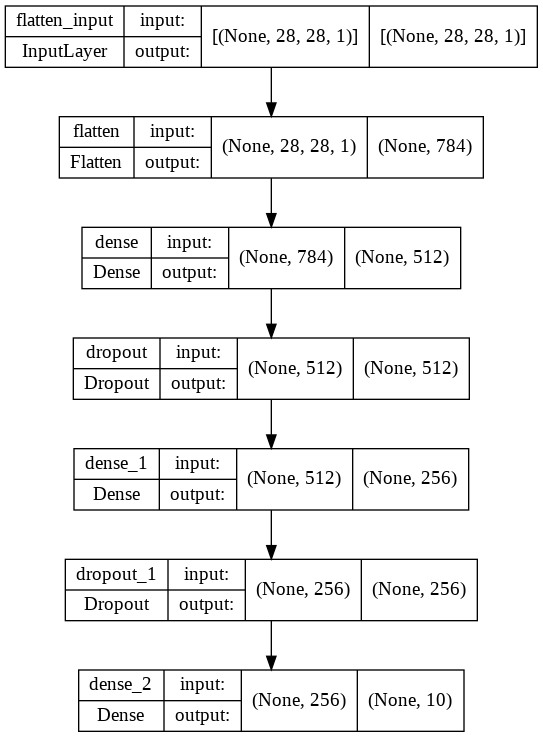

In [7]:
plot_model(model_mlp,show_shapes=True)

In [8]:
model_mlp.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_mlp = ModelCheckpoint("MLP_MNISTmodel.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [9]:
history = model_mlp.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val),batch_size=300,callbacks=[checkpoint_mlp])

Epoch 1/20
200/200 [==============================] - 4s 12ms/step - loss: 0.3922 - accuracy: 0.8808 - val_loss: 0.1387 - val_accuracy: 0.9566
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1487 - accuracy: 0.9572 - val_loss: 0.0926 - val_accuracy: 0.9716
Epoch 3/20
200/200 [==============================] - 2s 9ms/step - loss: 0.1057 - accuracy: 0.9679 - val_loss: 0.0822 - val_accuracy: 0.9744
Epoch 4/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0827 - accuracy: 0.9747 - val_loss: 0.0790 - val_accuracy: 0.9750
Epoch 5/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.0723 - val_accuracy: 0.9786
Epoch 6/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0684 - val_accuracy: 0.9790
Epoch 7/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.0609 - val_accuracy: 0.9818
Epoch

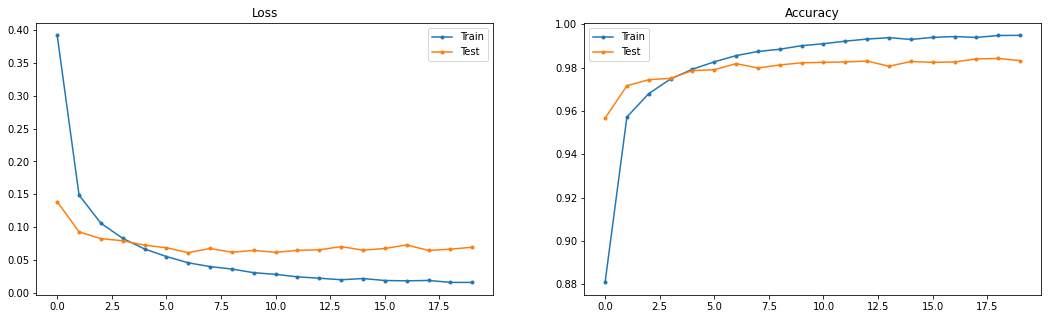

In [10]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [11]:
model_mlp.evaluate(X_test,Y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.0718 - accuracy: 0.9848


[0.07180089503526688, 0.9847999811172485]

## CNN

In [12]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(X_train.shape[1:])))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation="relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10,activation="softmax"))

In [13]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)       

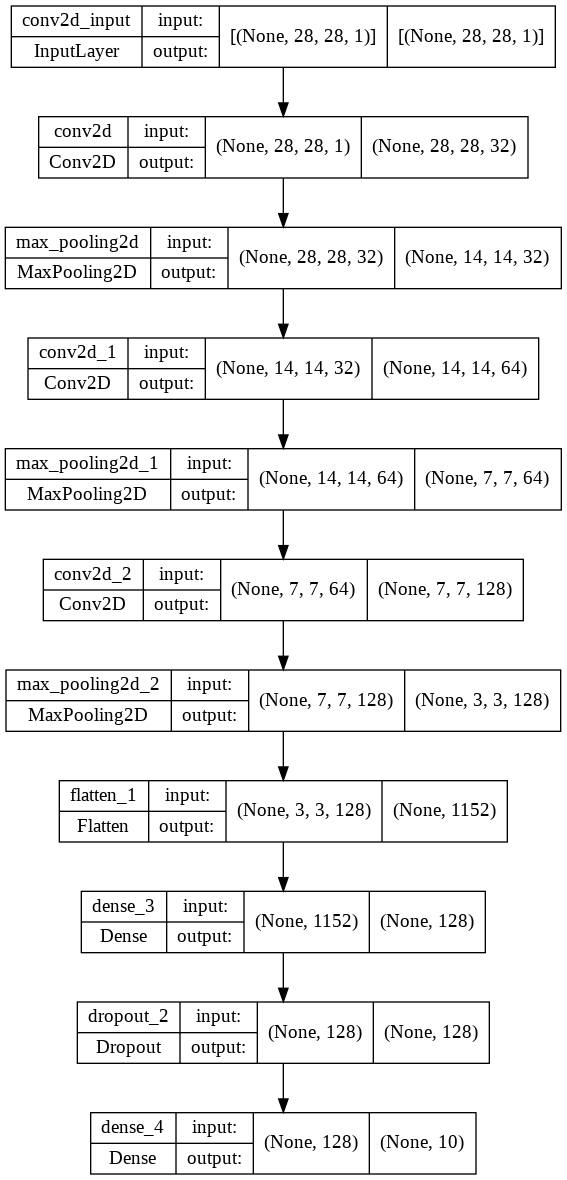

In [14]:
plot_model(model_cnn,show_shapes=True)

In [15]:
model_cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_cnn = ModelCheckpoint("CNN_MNISTmodel.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [16]:
history = model_cnn.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test),callbacks=[checkpoint_cnn],batch_size=300)

Epoch 1/20
200/200 [==============================] - 6s 24ms/step - loss: 0.4430 - accuracy: 0.8590 - val_loss: 0.0657 - val_accuracy: 0.9792
Epoch 2/20
200/200 [==============================] - 4s 22ms/step - loss: 0.1053 - accuracy: 0.9692 - val_loss: 0.0446 - val_accuracy: 0.9842
Epoch 3/20
200/200 [==============================] - 4s 22ms/step - loss: 0.0751 - accuracy: 0.9779 - val_loss: 0.0337 - val_accuracy: 0.9894
Epoch 4/20
200/200 [==============================] - 4s 22ms/step - loss: 0.0591 - accuracy: 0.9825 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 5/20
200/200 [==============================] - 4s 22ms/step - loss: 0.0482 - accuracy: 0.9862 - val_loss: 0.0232 - val_accuracy: 0.9926
Epoch 6/20
200/200 [==============================] - 4s 22ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.0246 - val_accuracy: 0.9922
Epoch 7/20
200/200 [==============================] - 4s 22ms/step - loss: 0.0374 - accuracy: 0.9891 - val_loss: 0.0254 - val_accuracy: 0.9922

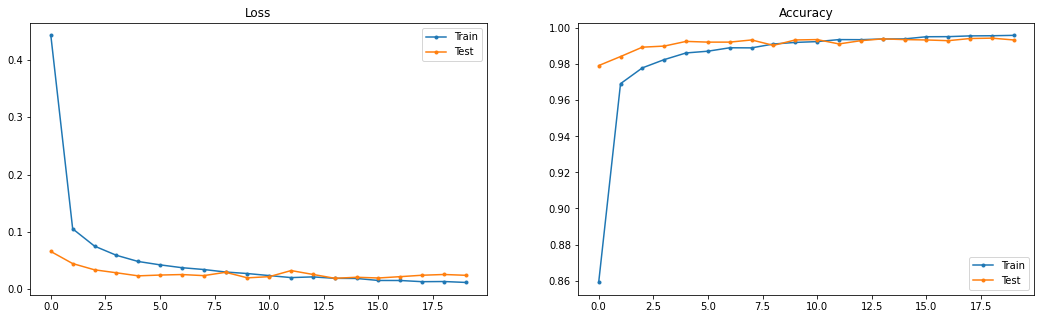

In [17]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [18]:
model_cnn.evaluate(X_test,Y_test)

157/157 [==============================] - 1s 6ms/step - loss: 0.0241 - accuracy: 0.9934


[0.024121124297380447, 0.993399977684021]